In [1]:
! pip install kaggle
from google.colab import files
files.upload()
# Make directory named kaggle and copy kaggle.json file there
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
# Change the permissions of the file
! chmod 600 ~/.kaggle/kaggle.json
# check if everything's okay
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
fardifaalam170041060/champions-league-dataset-1955-2023        UEFA Champions League Historical Dataset 1955-2023   10KB  2024-05-21 05:22:14            782         25  1.0              
zeesolver/spotfy                                               Spotify Songs Album                                  47KB  2024-05-10 09:21:57           2832         40  1.0              
rohit265/credit-card-eligibility-data-determining-factors      Credit Card Eligibility Data: Determining Factors   296KB  2024-05-18 11:31:28           1577         30  1.0              
guavocado/pokemon-stats-1025-po

In [ ]:
# Завантаження набору даних Competitions ('name-of-competition'-фрагмент посилання на competition, який слідує після “/c/”)
# ! kaggle competitions download -c 'name-of-competition'

# Загрузка Datasets (“name of the dataset” — це “user-name/dataset-name” , скопіювати текст після “www.kaggle.com/")
# ! kaggle datasets download <name-of-dataset>

# ! unzip <name-of-file>

# unzip в папку
# ! mkdir train
# ! unzip train.zip -d train

# Завантаження конкретних файлів
# ! kaggle competitions download 'name-of-competition' -f baseline_locations_train.csv

In [2]:
! kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data

Dataset URL: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data
License(s): CC-BY-NC-SA-4.0
 98% 83.0M/84.7M [00:03<00:00, 32.1MB/s]
100% 84.7M/84.7M [00:03<00:00, 24.9MB/s]


In [3]:
! mkdir climate_change
! unzip climate-change-earth-surface-temperature-data.zip -d climate_change

Archive:  climate-change-earth-surface-temperature-data.zip
  inflating: climate_change/GlobalLandTemperaturesByCity.csv  
  inflating: climate_change/GlobalLandTemperaturesByCountry.csv  
  inflating: climate_change/GlobalLandTemperaturesByMajorCity.csv  
  inflating: climate_change/GlobalLandTemperaturesByState.csv  
  inflating: climate_change/GlobalTemperatures.csv  


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import os

for dirname, _, filenames in os.walk('climate_change/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

climate_change/GlobalTemperatures.csv
climate_change/GlobalLandTemperaturesByCity.csv
climate_change/GlobalLandTemperaturesByState.csv
climate_change/GlobalLandTemperaturesByCountry.csv
climate_change/GlobalLandTemperaturesByMajorCity.csv


In [6]:
temper_df = pd.read_csv("climate_change/GlobalTemperatures.csv")
temper_major_city_df = pd.read_csv("climate_change/GlobalLandTemperaturesByMajorCity.csv")
temper_city_df = pd.read_csv("climate_change/GlobalLandTemperaturesByCity.csv")
temper_state_df = pd.read_csv("climate_change/GlobalLandTemperaturesByState.csv")
temper_country_df = pd.read_csv("climate_change/GlobalLandTemperaturesByCountry.csv")

In [7]:
dataframes = [temper_df, temper_major_city_df, temper_city_df, temper_state_df, temper_country_df]

Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv):

**Date**: starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures

**LandAverageTemperature**: global average land temperature in celsius

**LandAverageTemperatureUncertainty**: the 95% confidence interval around the average

**LandMaxTemperature**: global average maximum land temperature in celsius

**LandMaxTemperatureUncertainty**: the 95% confidence interval around the maximum land temperature

**LandMinTemperature**: global average minimum land temperature in celsius

**LandMinTemperatureUncertainty**: the 95% confidence interval around the minimum land temperature

**LandAndOceanAverageTemperature**: global average land and ocean temperature in celsius

**LandAndOceanAverageTemperatureUncertainty**: the 95% confidence interval around the global average land and ocean temperature

In [8]:
for df in dataframes:
  print(df.columns)

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')
Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')
Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')
Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'State',
       'Country'],
      dtype='object')
Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')


# **Data exploration**

**GlobalTemperatures**

In [9]:
print(temper_df.shape)
temper_df.describe()

(3192, 9)


,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [10]:
temper_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
temper_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


**GlobalLandTemperaturesByMajorCity**

In [ ]:
print(temper_major_city_df.shape)
temper_major_city_df.describe()

(239177, 7)


,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [ ]:
temper_major_city_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [ ]:
temper_major_city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [ ]:
temper_major_city_df['City'].value_counts()

Rome          3239
Istanbul      3239
Montreal      3239
Madrid        3239
Chicago       3239
              ... 
Kano          1893
Durban        1881
Cape Town     1881
Umm Durman    1857
Lima          1591
Name: City, Length: 100, dtype: int64

**GlobalLandTemperaturesByCity**

In [ ]:
print(temper_city_df.shape)
temper_city_df.describe()

(8599212, 7)


,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [ ]:
temper_city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [ ]:
temper_city_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
temper_city_df['City'].value_counts()

Springfield     9545
Worcester       8359
León            7469
Rongcheng       6526
Cambridge       6478
                ... 
Machala         1591
Chimbote        1584
Chiclayo        1584
Trujillo        1584
Port Moresby    1581
Name: City, Length: 3448, dtype: int64

**GlobalLandTemperaturesByState**

In [ ]:
print(temper_state_df.shape)
temper_state_df.describe()

(645675, 5)


,AverageTemperature,AverageTemperatureUncertainty
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [ ]:
temper_state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


In [ ]:
temper_state_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


**GlobalLandTemperaturesByCountry**

In [ ]:
print(temper_country_df.shape)
temper_country_df.describe()

(577462, 4)


,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [ ]:
temper_country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [ ]:
temper_country_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


## Data cleaning

In [ ]:
print(len(temper_major_city_df['City'].unique()))
temper_major_city_df['City'].unique()

100


array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome', 'São Paulo',
       'S

In [ ]:
print(len(temper_major_city_df['Country'].unique()))
temper_major_city_df['Country'].unique()

49


array(["Côte D'Ivoire", 'Ethiopia', 'India', 'Syria', 'Egypt', 'Turkey',
       'Iraq', 'Thailand', 'Brazil', 'Germany', 'Colombia',
       'South Africa', 'Morocco', 'China', 'United States', 'Senegal',
       'Tanzania', 'Bangladesh', 'Pakistan', 'Zimbabwe', 'Vietnam',
       'Nigeria', 'Indonesia', 'Saudi Arabia', 'Afghanistan', 'Ukraine',
       'Congo (Democratic Republic Of The)', 'Peru', 'United Kingdom',
       'Angola', 'Spain', 'Philippines', 'Iran', 'Australia', 'Mexico',
       'Somalia', 'Canada', 'Russia', 'Japan', 'Kenya', 'France', 'Burma',
       'Italy', 'Chile', 'Dominican Republic', 'South Korea', 'Singapore',
       'Taiwan', 'Sudan'], dtype=object)

In [ ]:
print(len(temper_city_df.Country.unique()))
temper_city_df['Country'].unique()

159


array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [ ]:
print(len(temper_state_df.Country.unique()))
temper_state_df.Country.unique()

7


array(['Brazil', 'Russia', 'United States', 'Canada', 'India', 'China',
       'Australia'], dtype=object)

In [ ]:
print(len(temper_country_df.Country.unique()))
temper_country_df.Country.unique()

243


array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [ ]:
temper_country_df[temper_country_df['Country']=='Asia'].head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
32446,1816-04-01,6.982,2.937,Asia
32447,1816-05-01,13.985,1.880,Asia
32448,1816-06-01,17.820,1.668,Asia
32449,1816-07-01,18.944,1.685,Asia
32450,1816-08-01,18.688,1.318,Asia


In [ ]:
# як відрізняються дані по назвам, що дублюють країни
temper_country_df[temper_country_df['Country'].isin(
    ['Netherlands (Europe)','Netherlands',
     'United Kingdom (Europe)', 'United Kingdom',
     'Congo (Democratic Republic Of The)', 'Congo',
     'Denmark (Europe)', 'Denmark',
     'France (Europe)', 'France'])].groupby("Country")['AverageTemperature'].mean()

Country
Congo                                 24.462932
Congo (Democratic Republic Of The)    23.773665
Denmark                              -18.053051
Denmark (Europe)                       7.832859
France                                12.772446
France (Europe)                       10.416046
Netherlands                            9.504605
Netherlands (Europe)                   9.112799
United Kingdom                         8.489325
United Kingdom (Europe)                8.655788
Name: AverageTemperature, dtype: float64

In [13]:
doubles = ['Netherlands', 'United Kingdom', 'Denmark','France']
for double in doubles:
  temper_country_df.loc[temper_country_df.Country==double,'Country'] = double.replace(double, f'{double} (all)')
temper_country_df.loc[temper_country_df.Country.isin(doubles)]['Country']

Series([], Name: Country, dtype: object)

In [12]:
# temper_country_df.loc[temper_country_df.Country =='Congo','Country'] = 'Congo (Democratic Republic Of The)'
# temper_country_df.loc[temper_country_df.Country =='Congo','Country']

In [14]:
doubles = ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)']
for double in doubles:
  temper_country_df.loc[temper_country_df.Country==double,'Country'] = double.replace(' (Europe)', '')
temper_country_df.loc[temper_country_df.Country.isin(doubles)]['Country']

Series([], Name: Country, dtype: object)

In [15]:
continents = ['Asia','Europe', 'Africa', 'North America','Oceania', 'South America', 'Antarctica' ]
temper_country_df.loc[temper_country_df.Country.isin(continents)]['Country'].value_counts()

Country
Europe           3239
North America    2941
Asia             2370
Africa           1965
South America    1953
Oceania          1935
Antarctica        764
Name: count, dtype: int64

# **Missing values**

In [ ]:
# % missing values over tables
dfs = ['temper_df', 'temper_major_city_df', 'temper_city_df', 'temper_state_df', 'temper_country_df']
for df, name in zip(dataframes, dfs):
  print(f'\n"{name}"-------------------------------------------')
  print(f'\n"{name}"-------------------------------------------')
  print((df.isnull().sum()*100/df.shape[0]).round(1))



"temper_df"-------------------------------------------

"temper_df"-------------------------------------------
dt                                            0.0
LandAverageTemperature                        0.4
LandAverageTemperatureUncertainty             0.4
LandMaxTemperature                           37.6
LandMaxTemperatureUncertainty                37.6
LandMinTemperature                           37.6
LandMinTemperatureUncertainty                37.6
LandAndOceanAverageTemperature               37.6
LandAndOceanAverageTemperatureUncertainty    37.6
year                                          0.0
month                                         0.0
date                                          0.0
dtype: float64

"temper_major_city_df"-------------------------------------------

"temper_major_city_df"-------------------------------------------
dt                               0.0
AverageTemperature               4.6
AverageTemperatureUncertainty    4.6
City                        

In [16]:
# Додати колонку з роком, місяцем та датою у форматі datetime
for df in dataframes:
  df['date'] = pd.to_datetime(df['dt'], errors='coerce', format='%Y-%m-%d')
  df['year']= df['date'].dt.year
  df['month']= df['date'].dt.month
  df['day']= df['date'].dt.day
temper_df['day'].unique()

array([1], dtype=int32)

In [17]:
# видалити день
for df in dataframes:
  df.drop(['day'], axis=1,inplace=True)
  print(df['date'].min(), df['date'].max())

1750-01-01 00:00:00 2015-12-01 00:00:00
1743-11-01 00:00:00 2013-09-01 00:00:00
1743-11-01 00:00:00 2013-09-01 00:00:00
1743-11-01 00:00:00 2013-09-01 00:00:00
1743-11-01 00:00:00 2013-09-01 00:00:00


### **GlobalTemperatures**

In [ ]:
temper_df['month'].value_counts()

month
01    266
02    266
03    266
04    266
05    266
06    266
07    266
08    266
09    266
10    266
11    266
12    266
Name: count, dtype: int64

In [ ]:
# За який період відсутні дані по максимальній температурі
temper_df[temper_df['LandMaxTemperature'].isnull()]['year'].value_counts().sort_index()

year
1750    12
1751    12
1752    12
1753    12
1754    12
        ..
1845    12
1846    12
1847    12
1848    12
1849    12
Name: count, Length: 100, dtype: int64

In [ ]:
print(temper_df['LandMaxTemperature'].isnull().sum())

1200


Таблиця з глобальними температурами (temper_df) містить показники, 37.6% даних по яким відсутні. Період відсутніх даних - сторіччя. Використовувати ці показники можна тількі з 1850р.

In [ ]:
# відсутні значення в таблиці глобальних температур
tbl = temper_df[temper_df['LandAverageTemperature'].isnull()]
tbl

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month,date,day
10,1750-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1750,11,1750-11-01,1
16,1751-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1751,5,1751-05-01,1
18,1751-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1751,7,1751-07-01,1
21,1751-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1751,10,1751-10-01,1
22,1751-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1751,11,1751-11-01,1
23,1751-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1751,12,1751-12-01,1
25,1752-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1752,2,1752-02-01,1
28,1752-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1752,5,1752-05-01,1
29,1752-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1752,6,1752-06-01,1
30,1752-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1752,7,1752-07-01,1


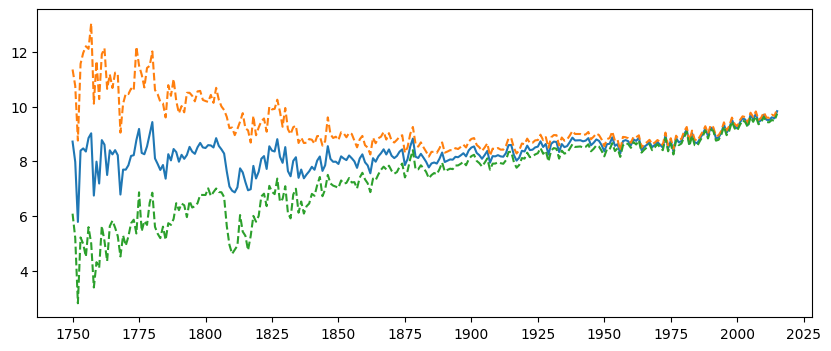

In [27]:
# LandAverageTemperature during 1750-2015 monthly with uncertainty interval
from matplotlib import ticker
locator = ticker.MultipleLocator(25)
fig, ax = plt.subplots(figsize = (10,4))
year_group = temper_df.groupby('year')['LandAverageTemperature'].mean()
year_group_unc = temper_df.groupby('year')['LandAverageTemperatureUncertainty'].mean()
ax.plot(year_group.index, year_group.values)
ax.plot(year_group.index, year_group.values+year_group_unc.values, ls="--")
ax.plot(year_group.index, year_group.values-year_group_unc.values, ls="--")
ax.xaxis.set_major_locator(locator)

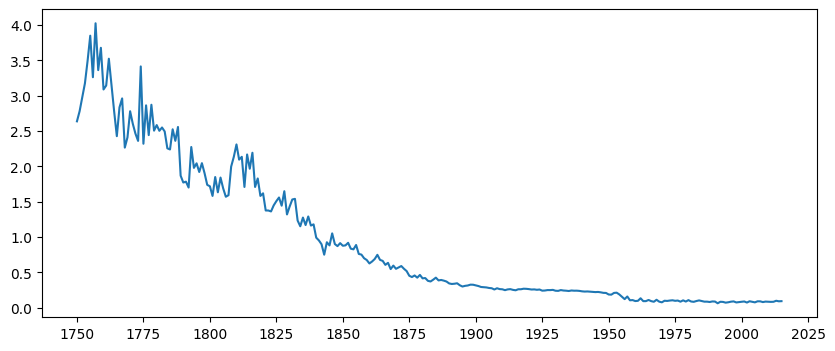

In [ ]:
# Довірчий інтервал для середньої температури з часом
locator = ticker.MultipleLocator(25)
fig, ax = plt.subplots(figsize = (10,4))
year_group = temper_df.groupby('year')['LandAverageTemperatureUncertainty'].mean()
ax.plot(year_group.index, year_group.values)
ax.xaxis.set_major_locator(locator)

Довірчий інтервал досить широкий на початку спостережень та ближче до 0 у останні десятиріччя, достовірність даних збільшується з часом.

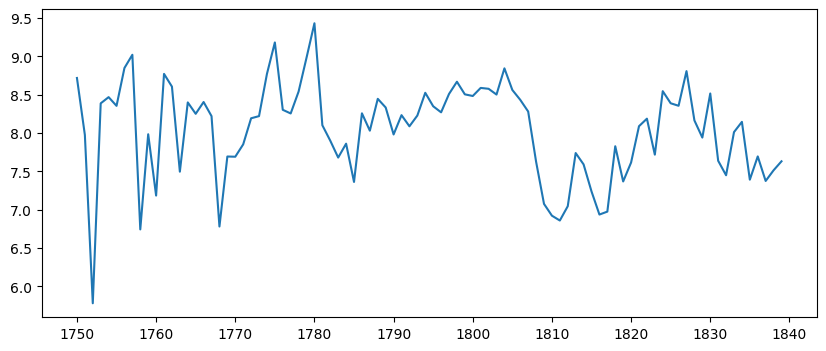

In [ ]:
# Період з 1750 по 1840, з найбільш недостовірними даними
locator = ticker.MultipleLocator(10)
fig, ax = plt.subplots(figsize = (10,4))
year_group = temper_df[temper_df['year']<1840].groupby('year')['LandAverageTemperature'].mean()
ax.plot(year_group.index, year_group.values)
ax.xaxis.set_major_locator(locator)

In [ ]:
# зміна температур впродовж десятиріччя 1750-1760 помісячно
piv = temper_df[temper_df['year'] < 1761].pivot_table('LandAverageTemperature', index='month', columns='year', aggfunc='mean')
piv

year,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760
month,,,,,,,,,,,
1,3.034,2.495,0.348,2.039,1.574,1.067,3.887,-0.276,-1.503,5.014,-0.811
2,3.083,0.963,NaN,0.715,-1.249,-0.108,5.666,3.704,0.806,4.082,2.436
3,5.626,5.800,5.806,5.424,3.677,3.607,4.192,4.529,3.765,4.520,1.864
4,8.490,7.670,8.265,8.272,11.610,9.263,10.042,8.246,7.210,5.983,7.436
5,11.573,NaN,NaN,12.186,11.936,12.881,14.164,13.039,9.715,10.189,10.661
6,12.937,13.827,NaN,14.585,14.388,15.380,14.547,17.115,13.139,13.512,11.945
7,15.868,NaN,NaN,15.092,14.681,14.397,13.906,17.610,13.847,12.526,12.887
8,14.750,14.405,NaN,14.148,13.556,13.515,13.437,17.910,11.818,14.587,13.917
9,11.413,10.673,NaN,13.322,11.129,11.773,12.652,14.852,10.028,12.626,11.197


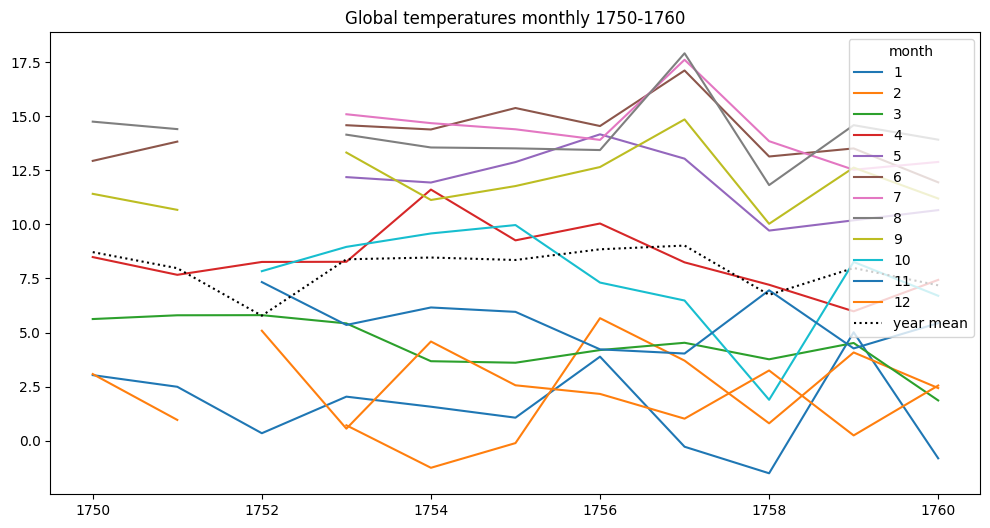

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
for i in range(1,13):
  ax.plot(piv.columns, piv.iloc[i-1], label=piv.index[i-1])
ax.plot(piv.columns, piv[piv.columns].mean(), color='black', ls=":", label='year mean')
ax.legend(title='month', loc='upper right');
ax.set_title("Global temperatures monthly 1750-1760");

In [ ]:
# Кількість місяців з відсутніми даними по AverageTemperature таблиці з країнами
temper_country_df[temper_country_df['AverageTemperature'].isnull()].groupby('Country')['date'].count()

Country
Afghanistan        21
Africa             71
Albania            73
Algeria            19
American Samoa    132
                 ... 
Western Sahara    185
Yemen               4
Zambia            275
Zimbabwe          240
Åland              73
Name: date, Length: 238, dtype: int64

In [ ]:
# null values by continents
nulls_continents = temper_country_df[temper_country_df['AverageTemperature'].isnull()].groupby('Country')['date'].count()[continents]/temper_country_df.groupby('Country')['date'].count()[continents]
nulls_continents

Country
Asia             0.001688
Europe           0.022538
Africa           0.036132
North America    0.156069
Oceania          0.002584
South America    0.000512
Antarctica       1.000000
Name: date, dtype: float64

По Антарктиці даних по середній температурі немає.

За період 1750-1756 дані по континентах відсутні

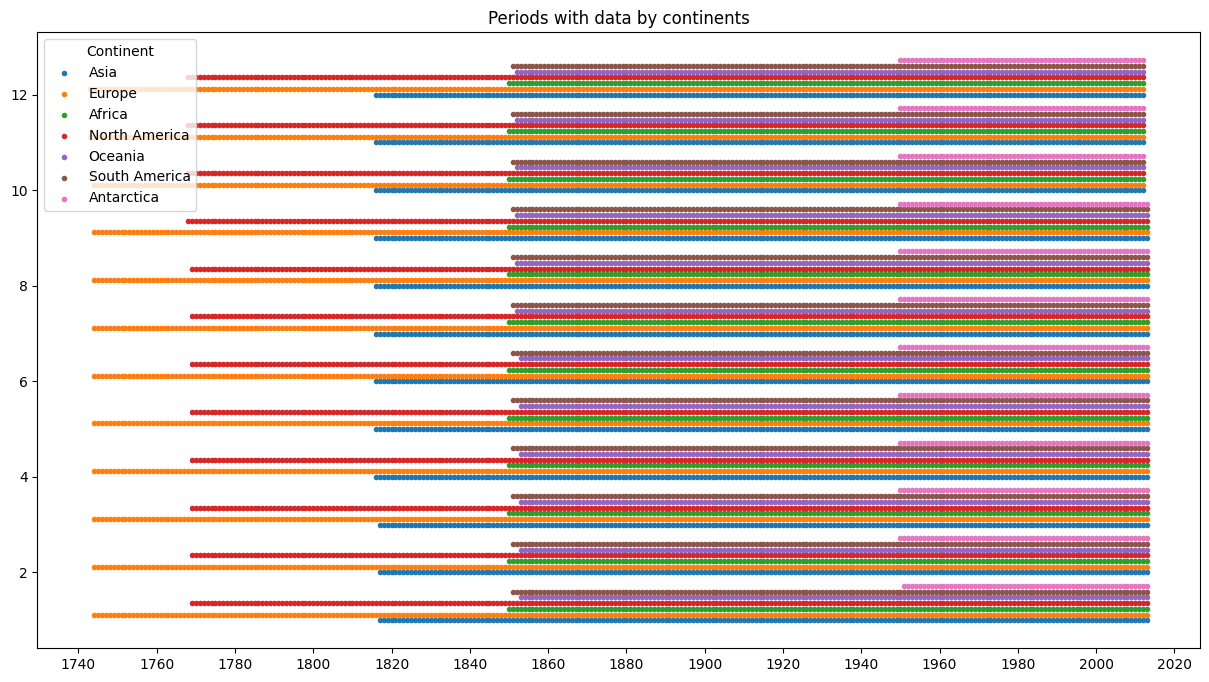

In [ ]:
# періоди з даними по континентах в таблиці країн
locator = ticker.MultipleLocator(20)
fig, ax = plt.subplots(figsize = (15,8))
for i, cont in enumerate(continents):
  ax.scatter(temper_country_df[temper_country_df["Country"]==cont]['year'],
             temper_country_df[temper_country_df["Country"]==cont]['month']+0.12*i, label= cont, marker='.')
ax.xaxis.set_major_locator(locator)
ax.legend(title='Continent', loc='upper left')
ax.set_title('Periods with data by continents');


In [ ]:
# температура за даними по країнах в період з 1750 по 1756
piv_country = temper_country_df[temper_country_df['year'].isin(range(1750, 1757))].pivot_table('AverageTemperature', index='month', columns='year', aggfunc='mean')
piv_country

year,1750,1751,1752,1753,1754,1755,1756
month,,,,,,,
1,0.29946,-0.66000,-1.66050,-1.560943,-0.912283,-3.630925,1.882566
2,2.58700,-2.32300,NaN,0.081943,-1.676019,-2.667925,3.586094
3,5.36996,4.79124,4.47498,5.371245,1.670679,2.976509,4.352250
4,7.80870,6.77086,7.12210,8.086887,8.876192,10.225774,7.882365
5,11.99204,NaN,NaN,12.774075,13.466442,12.969358,12.778981
6,15.58224,16.09116,NaN,17.470434,16.904792,18.478434,17.961472
7,19.18076,18.11332,NaN,18.806509,17.694453,18.664942,18.658717
8,17.73068,17.75010,NaN,17.327264,17.690755,16.698404,16.920868
9,13.61320,12.80542,NaN,14.677226,13.920491,13.714491,15.141094


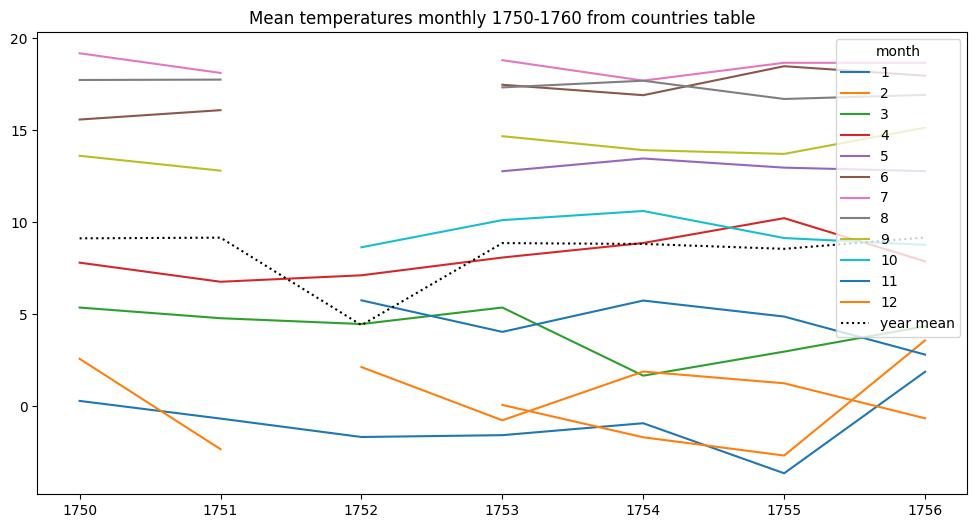

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
for i in range(1,13):
  ax.plot(piv_country.columns, piv_country.iloc[i-1], label=piv_country.index[i-1])
ax.plot(piv_country.columns, piv_country[piv_country.columns].mean(), color='black', ls=":", label='year mean')
ax.legend(title='month', loc='upper right')
ax.set_title("Mean temperatures monthly 1750-1760 from countries table");

In [ ]:
# Усереднити дані за період з 1750 по 1756 за кожний місяць по таблиці глобальних температур
avg1 = piv[piv.columns[0:-4]].mean(axis=1)

In [ ]:
# Усереднити дані за період з 1750 по 1756 за кожний місяць таблиці по країнах
avg2 = piv_country.mean(axis=1)
pd.concat([avg1, avg2], axis=1).rename(columns={0: "from global", 1: "from countries"})

,from global,from countries
month,,
1,2.063429,-0.891804
2,1.511667,-0.068651
3,4.876000,4.143838
4,9.087429,8.110411
5,12.548000,12.796179
6,14.277333,17.081422
7,14.788800,18.519784
8,13.968500,17.353012
9,11.827000,13.978654


Дані за 1750-1752 роки відсутні в таблиці по країнах за ті ж місяці, що і в таблиці по глобальній температурі, середні температури відрізняються для кожного місяця, в таблиці по країнах присутні за вказані роки здебільшого європейські країни. Відсутні дані краще замінити середніми значеннями за відповідні місяці у найближчі роки з таблиці глобальних температур.

In [ ]:
# періоди, за які відсутні дані в таблиці глобальних температур по LandAverageTemperature, що можна доповнити
to_fill = temper_df[temper_df['LandAverageTemperature'].isnull()].groupby(["year","month"]).count()
to_fill.index

MultiIndex([(1750, 11),
            (1751,  5),
            (1751,  7),
            (1751, 10),
            (1751, 11),
            (1751, 12),
            (1752,  2),
            (1752,  5),
            (1752,  6),
            (1752,  7),
            (1752,  8),
            (1752,  9)],
           names=['year', 'month'])

In [ ]:
# Заповнити відсутні дані по глобальной темературі середнім значенням за відповідний місяць
# в період з 1756 по 1756 (за цей період середні температури більш однорідні)
for item in to_fill.index:
  temper_df.loc[(temper_df['year']==item[0]) & (temper_df['month']==item[1]),'LandAverageTemperature'] = avg1.loc[item[1]]

In [ ]:
temper_df[temper_df['LandAverageTemperature'].isnull()]

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,date,year,month


In [ ]:
num_cols = temper_df.select_dtypes(include=np.number).columns
temper_df[num_cols].isnull().any()

LandAverageTemperature                       False
LandAverageTemperatureUncertainty             True
LandMaxTemperature                            True
LandMaxTemperatureUncertainty                 True
LandMinTemperature                            True
LandMinTemperatureUncertainty                 True
LandAndOceanAverageTemperature                True
LandAndOceanAverageTemperatureUncertainty     True
year                                         False
month                                        False
dtype: bool

### Аналіз температур

In [18]:
def get_season(month):
  if month <= 2 or month == 12:
    return 'winter'
  elif month >=3 and month <= 5:
    return 'spring'
  elif month >= 6 and month <= 8:
    return 'summer'
  else:
    return 'autumn'

for df in dataframes:
  df['season'] = df['month'].apply(get_season)

In [19]:
def get_subplots(**kwargs):
  nrow= kwargs['nrow']
  ncol= kwargs['ncol']
  figsize = kwargs['figsize']
  xlabel = kwargs['xlabel']
  ylabel = kwargs['ylabel']
  frame_sides = kwargs['frame_sides']
  fig, ax = plt.subplots(nrow, ncol, figsize=figsize)
  # plt.subplots_adjust(hspace=0.9, wspace=0.5) # spaces between subplots
  fig.set_tight_layout('tight') #fit content of figure

  for axe in ax.flat:
    axe.grid(False)
    axe.set_ylabel(ylabel)
    axe.set_xlabel(xlabel)
    if frame_sides==False:
      # hide frame lines
      for side in ['top', 'right', 'bottom']:
        axe.spines[side].set_visible(False)
  return fig, ax

<ipython-input-79-d24aa0efc20e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


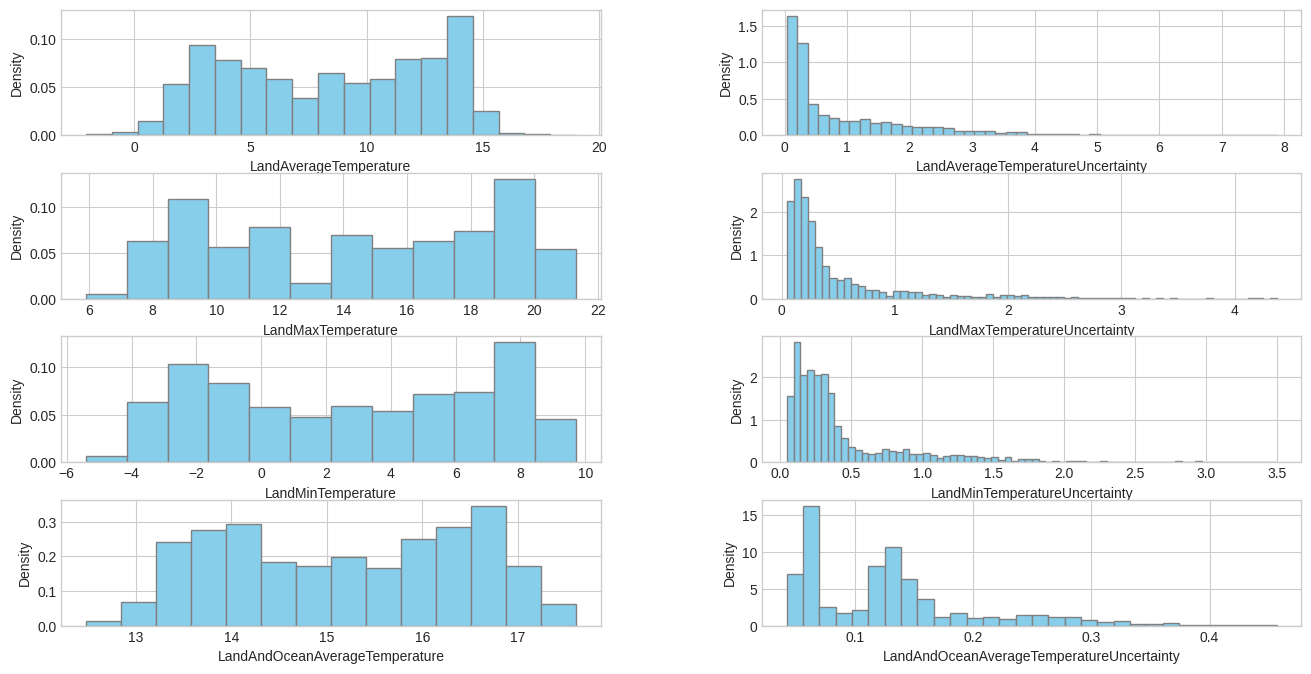

In [ ]:
# Розподіл глобальних температур
plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(4,2, figsize=(16,8))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axes.flat):
    ax.hist(temper_df[num_cols[i]], bins='auto', density=True, color='skyblue', edgecolor='grey')
    ax.set(xlabel= num_cols[i], ylabel='Density')

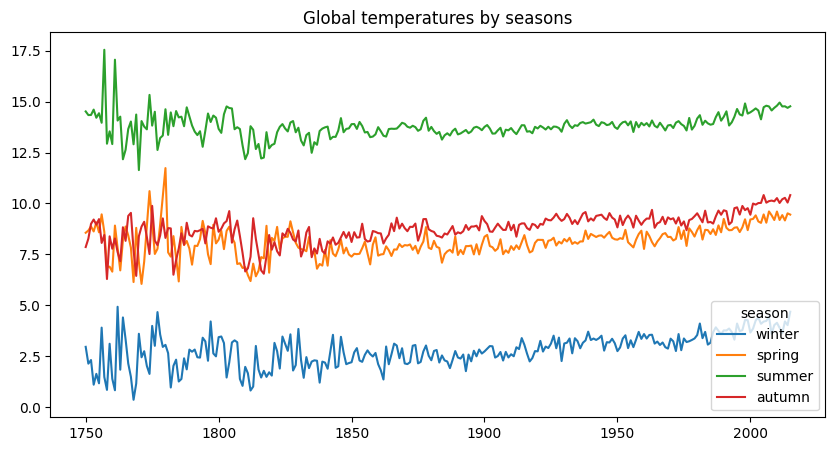

In [ ]:
# Зміна температур по сезонах
seasons = ['winter', 'spring', 'summer', 'autumn']
season_groups = temper_df.groupby(['year', 'season'])['LandAverageTemperature'].mean().reset_index()
fig, ax = plt.subplots(figsize=(10,5))
for season in seasons:
  ax.plot(season_groups[season_groups['season']==season]['year'],
          season_groups[season_groups['season']==season]['LandAverageTemperature'], label=season)
ax.legend(title='season', loc='lower right')
ax.set_title("Global temperatures by seasons");

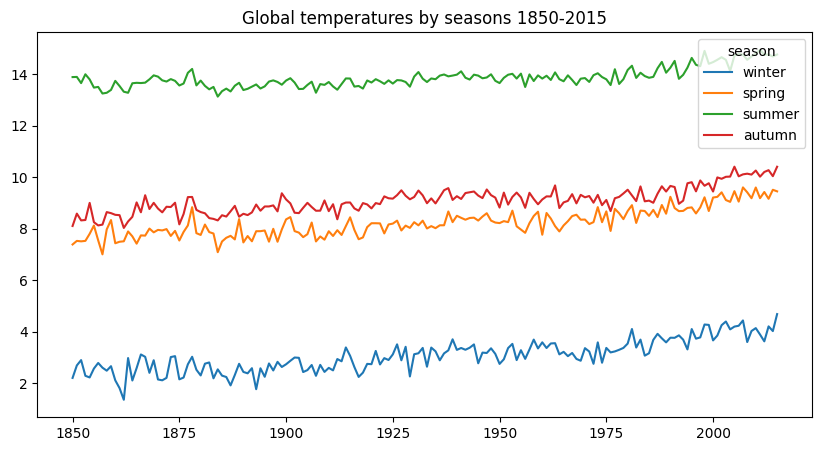

In [ ]:
# Зміна температур по сезонах з 1850 по 2015
fig, ax = plt.subplots(figsize=(10,5))
for season in seasons:
  ax.plot(season_groups[(season_groups['season']==season) & (season_groups['year'] >= 1850)]['year'],
          season_groups[(season_groups['season']==season) & (season_groups['year'] >= 1850)]['LandAverageTemperature'], label=season)
ax.legend(title='season', loc='upper right')
ax.set_title('Global temperatures by seasons 1850-2015');

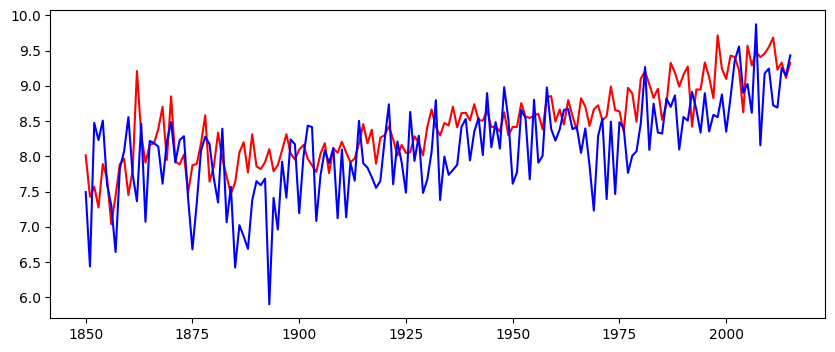

In [ ]:
# min from max t, max from min t
locator = ticker.MultipleLocator(25)
fig, ax = plt.subplots(figsize = (10,4))
max_group = temper_df[temper_df.year >= 1850].groupby('year')[num_cols].max()
min_group = temper_df[temper_df.year >= 1850].groupby('year')[num_cols].min()
ax.plot(max_group.index, max_group.LandMinTemperature, color='r')
ax.plot(min_group.index, min_group.LandMaxTemperature, color='b')
ax.xaxis.set_major_locator(locator)
ax.set_title('Max temperatures from minimum and minimum temperatures from maximum yearly');

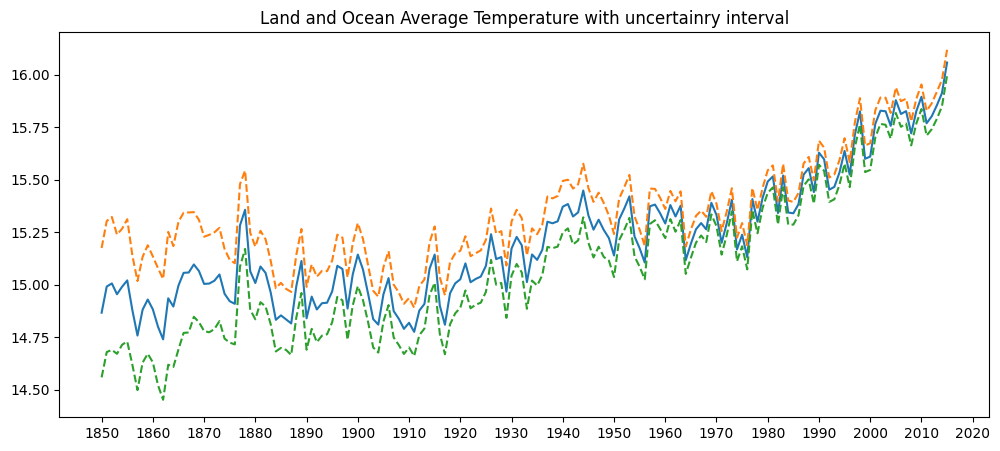

In [ ]:
# LandAndOceanAverageTemperature during 1850-2015 monthly with uncertainty interval
locator = ticker.MultipleLocator(10)
fig, ax = plt.subplots(figsize = (12,5))
year_land_ocean = temper_df.groupby('year')['LandAndOceanAverageTemperature'].mean()
year_land_ocean_unc = temper_df.groupby('year')['LandAndOceanAverageTemperatureUncertainty'].mean()
ax.plot(year_land_ocean.index, year_land_ocean.values)
ax.plot(year_land_ocean.index, year_land_ocean.values+year_land_ocean_unc.values, ls="--")
ax.plot(year_land_ocean.index, year_land_ocean.values-year_land_ocean_unc.values, ls="--")
ax.xaxis.set_major_locator(locator)
ax.set_title('Land and Ocean Average Temperature with uncertainry interval');

In [ ]:
# періоди, за які відсутні дані по континентах в таблиці температур країн по AverageTemperature, починаючи з 1850р.
continents.remove('Antarctica')
nulls_cont = temper_country_df[(temper_country_df['Country'].isin(continents)) & (temper_country_df['year'] >=1850)
    & (temper_country_df['AverageTemperature'].isnull())]
nulls_cont['date']

5356     1850-12-01
5357     1851-01-01
5358     1851-02-01
5359     1851-03-01
5360     1851-04-01
            ...    
392230   1854-03-01
392231   1854-04-01
392240   1855-01-01
394144   2013-09-01
486720   2013-09-01
Name: date, Length: 79, dtype: datetime64[ns]

In [ ]:
nulls_cont.groupby(['Country', "year"]).count().reset_index()

,Country,year,dt,AverageTemperature,AverageTemperatureUncertainty,date,month,season,Continent
0,Africa,1850,1,0,0,1,1,1,0
1,Africa,1851,12,0,0,12,12,12,0
2,Africa,1852,12,0,0,12,12,12,0
3,Africa,1853,12,0,0,12,12,12,0
4,Africa,1854,12,0,0,12,12,12,0
5,Africa,1855,12,0,0,12,12,12,0
6,Africa,1856,7,0,0,7,7,7,0
7,Africa,1857,1,0,0,1,1,1,0
8,Africa,1866,1,0,0,1,1,1,0
9,Africa,2013,1,0,0,1,1,1,0


In [25]:
cont_group = temper_country_df[temper_country_df['Country'].isin(continents)].groupby(['Country', 'year'])[['AverageTemperature', 'AverageTemperatureUncertainty']].mean().reset_index()
cont_group

,Country,year,AverageTemperature,AverageTemperatureUncertainty
0,Africa,1850,23.672273,1.135545
1,Africa,1851,NaN,NaN
2,Africa,1852,NaN,NaN
3,Africa,1853,NaN,NaN
4,Africa,1854,NaN,NaN
...,...,...,...,...
1263,South America,2009,22.652583,0.171917
1264,South America,2010,22.677333,0.162750
1265,South America,2011,22.473000,0.183250
1266,South America,2012,22.722583,0.218167


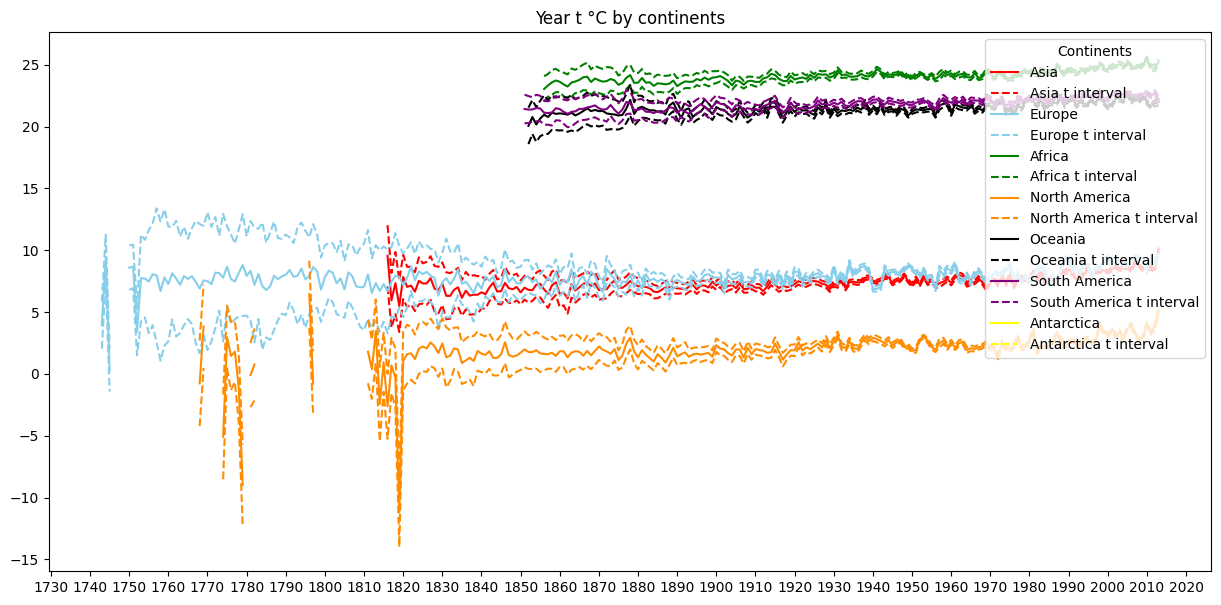

In [28]:
locator = ticker.MultipleLocator(10)
fig, ax = plt.subplots(figsize = (15,7))
colors = ['red', 'skyblue', 'green', 'darkorange', 'black', 'purple', 'yellow', 'lightgreen', 'grey','brown']
for i, cont in enumerate(continents):
  subgroup = cont_group[cont_group['Country']==cont]
  ax.plot(subgroup.year, subgroup.AverageTemperature, color=colors[i], label=cont)
  ax.plot(subgroup.year, subgroup.AverageTemperature+subgroup.AverageTemperatureUncertainty, color=colors[i], ls="--", label=f'{cont} t interval')
  ax.plot(subgroup.year, subgroup.AverageTemperature-subgroup.AverageTemperatureUncertainty, color=colors[i], ls="--")
ax.xaxis.set_major_locator(locator)
ax.legend(title='Continents', loc='upper right')
ax.set_title('Year t °C by continents');

In [ ]:
df_conts = temper_country_df[temper_country_df['Country'].isin(continents)]
first_group_yearly = df_conts[df_conts['year'].isin(range(1880,1951))].groupby(['Country', 'year'])['AverageTemperature'].mean()
second_group_yearly = df_conts[df_conts['year'].isin(range(1951,2013))].groupby(['Country', 'year'])['AverageTemperature'].mean()
first_group = df_conts[df_conts['year'].isin(range(1880,1951))]
second_group = df_conts[df_conts['year'].isin(range(1951,2013))]

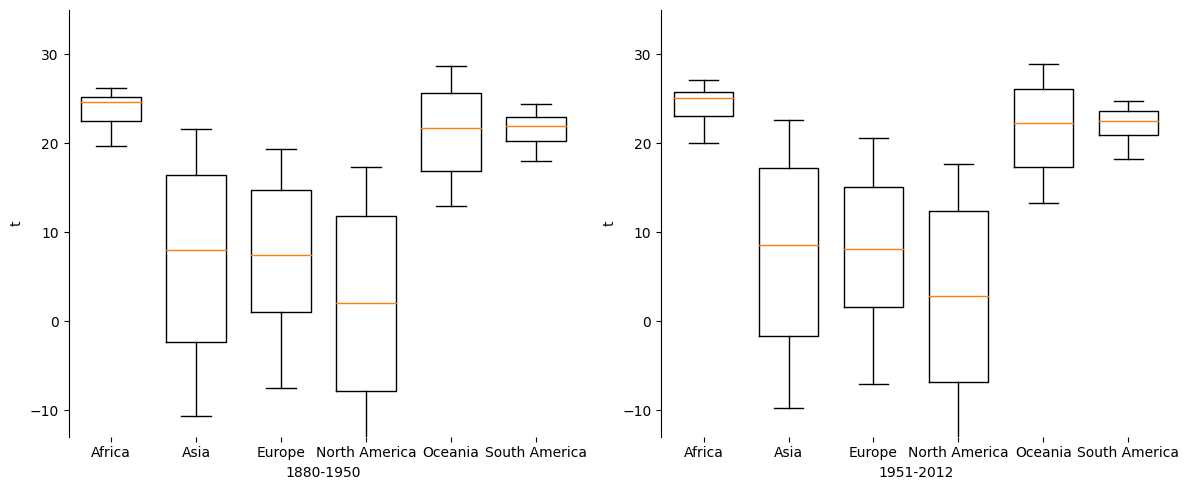

In [ ]:
fig, axes = get_subplots(nrow=1, ncol=2, figsize=(12, 5),  xlabel='', ylabel='t',\
                       frame_sides=False )
conts = first_group['Country'].unique()
bp_set1 = [first_group['AverageTemperature'][first_group['Country']==c] for c in conts]
axes[0].boxplot(bp_set1, widths=0.7, labels=conts)
bp_set2 = [second_group['AverageTemperature'][second_group['Country']==c] for c in conts]
axes[1].boxplot(bp_set2, widths=0.7, labels=conts)
axes[0].set_xlabel('1880-1950')
axes[1].set_xlabel('1951-2012')
mn_y, mx_y = first_group['AverageTemperature'].min(), second_group['AverageTemperature'].max()
for ax in axes:
  ax.set_ylim(np.floor(mn_y-mn_y*0.2), np.ceil(mx_y+mx_y*0.2))

## Відобрження змін температури з часом на карті по країнах

In [ ]:
# Зміна температури по країнах за період (1880-1950) vs (1951-2012)
older_group = temper_country_df[temper_country_df['year'].isin(range(1880,1951))].groupby(['Country'])['AverageTemperature'].mean()
newer_group = temper_country_df[temper_country_df['year'].isin(range(1951,2013))].groupby(['Country'])['AverageTemperature'].mean()
diff = newer_group-older_group
diff.sort_values()

Country
Iceland                                0.313193
Faroe Islands                          0.364936
Ireland                                0.393793
Greece                                 0.395012
Isle Of Man                            0.418391
                                         ...   
Uzbekistan                             0.929641
Kazakhstan                             1.006088
Heard Island And Mcdonald Islands      1.290505
French Southern And Antarctic Lands    1.335641
Antarctica                                  NaN
Name: AverageTemperature, Length: 243, dtype: float64

In [ ]:
df_diff = pd.DataFrame(diff).reset_index()
df_diff['AverageTemperatureShift(1880-1950;1951-2012)'] = df_diff['AverageTemperature']
df_diff.drop(['AverageTemperature'], inplace=True, axis=1)
df_diff.head()

,Country,AverageTemperatureShift(1880-1950;1951-2012)
0,Afghanistan,0.702245
1,Africa,0.536039
2,Albania,0.436756
3,Algeria,0.618101
4,American Samoa,0.574763


In [ ]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 37.8 MB/s eta 0:00:00


In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.colors as mcolors

# Завантаження даних про границі країн
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Приєднання даних про температуру до даних про границі країн
world = world.merge(df_diff, how='left', left_on='name', right_on='Country')
world[world.Country.isnull()]['name']

<ipython-input-28-f17fbac784d1>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


2                     W. Sahara
4      United States of America
11              Dem. Rep. Congo
17               Dominican Rep.
20                 Falkland Is.
23       Fr. S. Antarctic Lands
24                  Timor-Leste
60                Côte d'Ivoire
62                Guinea-Bissau
66         Central African Rep.
69                   Eq. Guinea
73                     eSwatini
79                    Palestine
89                      Vanuatu
93                      Myanmar
135                 Solomon Is.
149                      Brunei
153                     Czechia
160                   N. Cyprus
167                  Somaliland
170            Bosnia and Herz.
171             North Macedonia
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: name, dtype: object

In [ ]:
# словник для приведення у відповідність назв з бібліотеки та в даних
def add_country(country):
  dict_to_map = {'United States of America': 'United States', 'The Bahamas': 'Bahamas',
               'Trinidad and Tobago': 'Trinidad And Tobago', 'Saint Vincent and the Grenadines': 'Saint Vincent And The Grenadines',
               'Antigua and Barbuda': 'Antigua And Barbuda', 'Saint Kitts and Nevis': 'Saint Kitts And Nevis',
               'United Republic of Tanzania': 'Tanzania','Republic of the Congo': 'Congo',
               'Democratic Republic of the Congo': 'Congo (Democratic Republic Of The)', 'Dem. Rep. Congo': 'Congo (Democratic Republic Of The)',
               'Ivory Coast': "Côte D'Ivoire", 'eSwatini': 'Swaziland', 'Guinea-Bissau': 'Guinea Bissau',
               'São Tomé and Principe': 'Sao Tome And Principe', 'Cabo Verde': 'Cape Verde',
               'Czechia': 'Czech Republic', 'North Macedonia': 'Macedonia', 'Republic of Serbia': 'Serbia',
               'Bosnia and Herzegovina': 'Bosnia And Herzegovina', 'Turks and Caicos Islands': 'Turks And Caicas Islands',
               'Saint Pierre and Miquelon': 'Saint Pierre And Miquelon',
               'United States Virgin Islands': 'Virgin Islands', 'Saint Barthelemy': 'Saint Barthélemy',
               'Falkland Islands': 'Falkland Islands (Islas Malvinas)', 'Palestine': 'Palestina',
               'East Timor': 'Timor Leste', 'Hong Kong S.A.R.': 'Hong Kong', 'Macao S.A.R': 'Macau',
               'Isle of Man': 'Isle Of Man', 'Aland': 'Åland', 'Federated States of Micronesia': 'Federated States Of Micronesia',
               'W. Sahara': 'Western Sahara', 'Dominican Rep.':'Dominican Republic', 'Falkland Is.': 'Falkland Islands (Islas Malvinas)',
               'Fr. S. Antarctic Lands': 'French Southern And Antarctic Lands', 'Timor-Leste': 'Timor Leste', "Côte d'Ivoire": "Côte D'Ivoire",
               'Central African Rep.': 'Central African Republic', 'Eq. Guinea': 'Equatorial Guinea',
               'Solomon Is.':'Solomon Islands', 'Somaliland': 'Somalia', 'Bosnia and Herz.': 'Bosnia And Herzegovina', 'Myanmar': 'Burma'}

  if country in dict_to_map.keys():
    return dict_to_map[country]
  else:
    return country
world['Country'] = world['Country'].fillna(world['name'].apply(lambda x: add_country(x)))

In [ ]:
world[world['AverageTemperatureShift(1880-1950;1951-2012)'].isnull()]['Country']

2                           Western Sahara
4                            United States
11      Congo (Democratic Republic Of The)
17                      Dominican Republic
20       Falkland Islands (Islas Malvinas)
23     French Southern And Antarctic Lands
24                             Timor Leste
60                           Côte D'Ivoire
62                           Guinea Bissau
66                Central African Republic
69                       Equatorial Guinea
73                               Swaziland
79                               Palestina
89                                 Vanuatu
93                                   Burma
135                        Solomon Islands
149                                 Brunei
153                         Czech Republic
159                             Antarctica
160                              N. Cyprus
167                                Somalia
170                 Bosnia And Herzegovina
171                              Macedonia
174        

In [ ]:
def add_t(country):
  if country in df_diff['Country'].values:
    return df_diff.loc[df_diff['Country']==country, 'AverageTemperatureShift(1880-1950;1951-2012)'].values[0]

world['AverageTemperatureShift(1880-1950;1951-2012)'] = world['AverageTemperatureShift(1880-1950;1951-2012)'].fillna(world['Country'].apply(lambda x: add_t(x)))
world[world['AverageTemperatureShift(1880-1950;1951-2012)'].isnull()]['Country']

89        Vanuatu
149        Brunei
159    Antarctica
160     N. Cyprus
174        Kosovo
176      S. Sudan
Name: Country, dtype: object

Про деякі країни дані відсутні

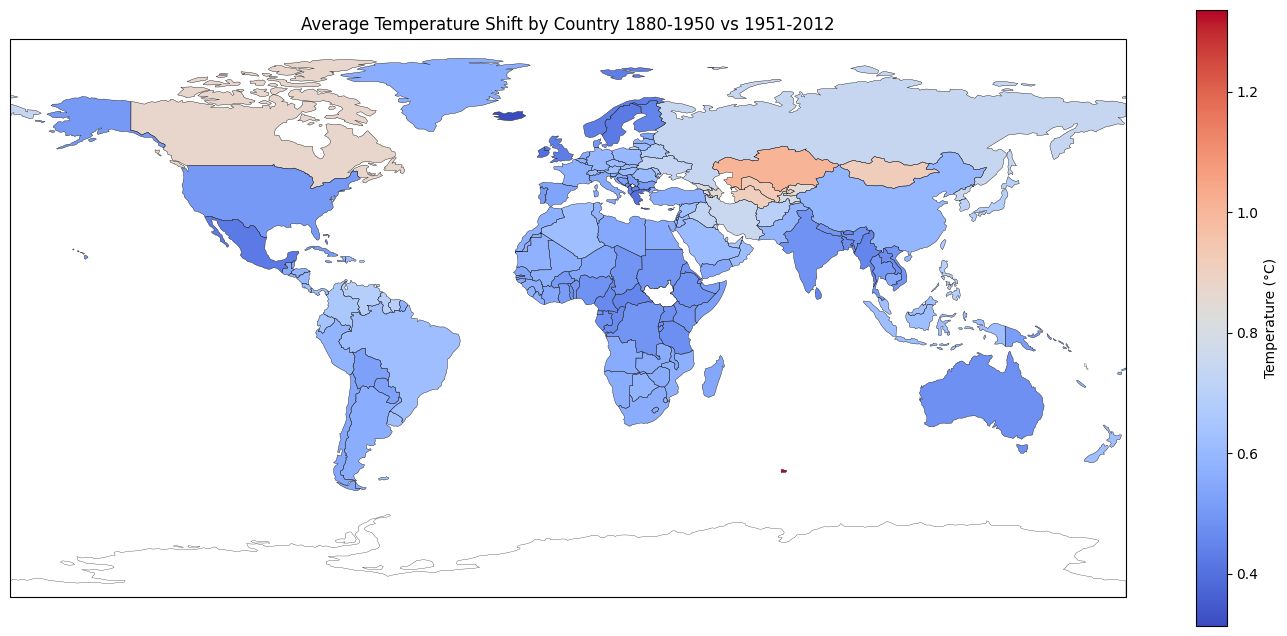

In [ ]:
# Створення шкали кольорів
norm = mcolors.Normalize(vmin=world['AverageTemperatureShift(1880-1950;1951-2012)'].min(), vmax=world['AverageTemperatureShift(1880-1950;1951-2012)'].max())
cmap = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm')

# створеня мапи
fig = plt.figure(figsize=(18, 16))
ax = plt.axes(projection=ccrs.PlateCarree())

# Малювання країн з відповідними кольорами
world.boundary.plot(ax=ax, linewidth=0.2, edgecolor='black')
world.plot(column='AverageTemperatureShift(1880-1950;1951-2012)', cmap='coolwarm', linewidth=0.2, ax=ax, edgecolor='0.5')

# Додавання шкали кольорів
cbar = plt.colorbar(cmap, ax=ax, orientation='vertical', shrink=0.5, pad=0.05)
cbar.set_label('Temperature (°C)')

plt.title('Average Temperature Shift by Country 1880-1950 vs 1951-2012');

In [ ]:
# Країни з максимальною та мінімальною зміною температури (1880-1950)vs(1951-2012)
max_shift_country = world[world['AverageTemperatureShift(1880-1950;1951-2012)']==world['AverageTemperatureShift(1880-1950;1951-2012)'].max()]['Country'].values[0]
min_shift_country = world[world['AverageTemperatureShift(1880-1950;1951-2012)']==world['AverageTemperatureShift(1880-1950;1951-2012)'].min()]['Country'].values[0]
print(f'Max shift: {max_shift_country}')
print(f'Min shift: {min_shift_country}')

Max shift: French Southern And Antarctic Lands
Min shift: Iceland


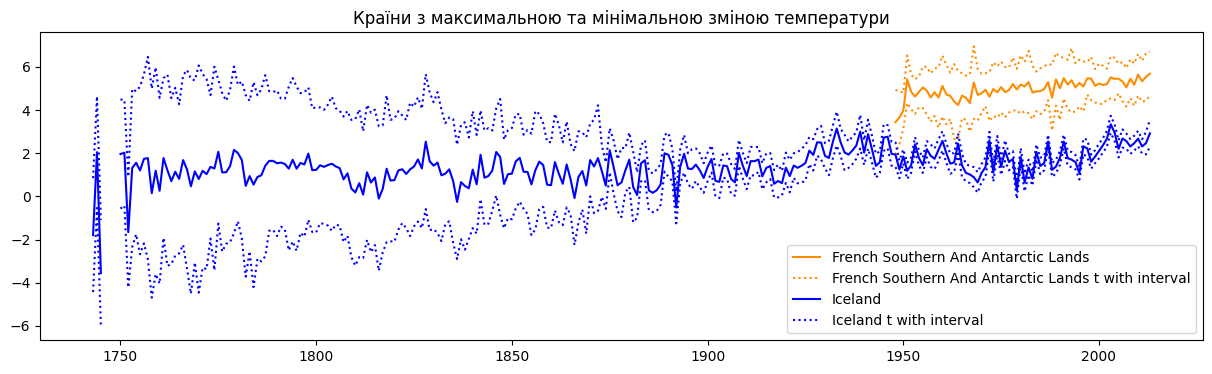

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))
selection = temper_country_df[temper_country_df['Country'].isin([max_shift_country, min_shift_country])].groupby(['Country', 'year'])[['AverageTemperature', 'AverageTemperatureUncertainty']].mean().reset_index()
idx1 = selection[selection['Country']==max_shift_country]
idx2 = selection[selection['Country']==min_shift_country]
ax.plot(idx1.year, idx1.AverageTemperature, label=f'{max_shift_country}', color='darkorange')
ax.plot(idx1.year, idx1.AverageTemperature+idx1.AverageTemperatureUncertainty, ls=":", color='darkorange')
ax.plot(idx1.year, idx1.AverageTemperature-idx1.AverageTemperatureUncertainty, label=f'{max_shift_country} t with interval', ls=":", color='darkorange')
ax.plot(idx2.year, idx2.AverageTemperature, label=f'{min_shift_country}', color='blue')
ax.plot(idx2.year, idx2.AverageTemperature+idx2.AverageTemperatureUncertainty, ls=":", color='blue')
ax.plot(idx2.year, idx2.AverageTemperature-idx2.AverageTemperatureUncertainty, label=f'{min_shift_country} t with interval', ls=":", color='blue')
ax.legend()
ax.set_title("Країни з максимальною та мінімальною зміною температури (1880-1950)vs(1951-2012)");

### Через те, що немає даних по деяким країнам до 1950 року, в тому числі по French Southern And Antarctic Lands, неможна вважати, що там відбулося значне підвищення температури. Для аналізу по країнам краще обрати більш пізній інтервал для порівняння.

In [ ]:
# Знайти мінімальний рік, з якого присутні дані по всіх країнах
temper_country_df.groupby(['Country'])['year'].min().values.max()

1950

In [ ]:
# кількість місяців з відсутніми даними по країнам з 1950р.
t = temper_country_df[temper_country_df['year']>=1950]
t[t['AverageTemperature'].isnull()][['Country', 'date']].groupby('Country').count().sort_values(by='date')

,date
Country,
Afghanistan,1
Niger,1
Nigeria,1
Niue,1
North Korea,1
...,...
French Guiana,1
Åland,1
French Southern And Antarctic Lands,2


In [ ]:
old_group = temper_country_df[temper_country_df['year'].isin(range(1950,1981))].groupby(['Country'])['AverageTemperature'].mean()
new_group = temper_country_df[temper_country_df['year'].isin(range(1981,2013))].groupby(['Country'])['AverageTemperature'].mean()
shift = new_group - old_group
shift.sort_values()

Country
Macau           0.143342
Hong Kong       0.150475
Bangladesh      0.177608
Laos            0.183506
Vietnam         0.201494
                  ...   
Kazakhstan      0.945480
Mongolia        0.954942
Turkmenistan    0.972032
Russia          1.030695
Antarctica           NaN
Name: AverageTemperature, Length: 243, dtype: float64

In [ ]:
# Додати в таблицю world дані по різниці середніх температур по країнах за 1950-1980 vs 1981-2012рр.
shift = pd.DataFrame(shift).reset_index()
shift['ShiftAverageTemperature(1950-1980)vs(1981-2012)'] = shift['AverageTemperature']
shift.drop(['AverageTemperature'], inplace=True, axis=1)
world = world.merge(shift, how='left', on='Country')
world[world['ShiftAverageTemperature(1950-1980)vs(1981-2012)'].isnull()]['Country']

89        Vanuatu
149        Brunei
159    Antarctica
160     N. Cyprus
174        Kosovo
176      S. Sudan
Name: Country, dtype: object

In [ ]:
# Додати в таблицю world дані по середній температурі по країнах за 2000-2012рр.
world_temp_newest = temper_country_df[temper_country_df['year'].isin(range(2000,2013))].groupby(['Country'])['AverageTemperature'].mean().reset_index()
world_temp_newest['AverageTemperature(2000-2012)'] = world_temp_newest['AverageTemperature']
world_temp_newest.drop(['AverageTemperature'], inplace=True, axis=1)
world = world.merge(world_temp_newest, how='left', on='Country')
world[world['AverageTemperature(2000-2012)'].isnull()]['Country']

89        Vanuatu
149        Brunei
159    Antarctica
160     N. Cyprus
174        Kosovo
176      S. Sudan
Name: Country, dtype: object

In [ ]:
# Додати в таблицю world дані по середньому довірчому інтервалу середньої температури по країнах за 1950-1980.
uncertainty = temper_country_df[temper_country_df['year'].isin(range(1950,1981))].groupby(['Country'])['AverageTemperatureUncertainty'].mean()
uncertainty = pd.DataFrame(uncertainty).reset_index()
world = world.merge(uncertainty, how='left', on='Country')
world[world.AverageTemperatureUncertainty.isnull()]['Country']

89       Vanuatu
149       Brunei
160    N. Cyprus
174       Kosovo
176     S. Sudan
Name: Country, dtype: object

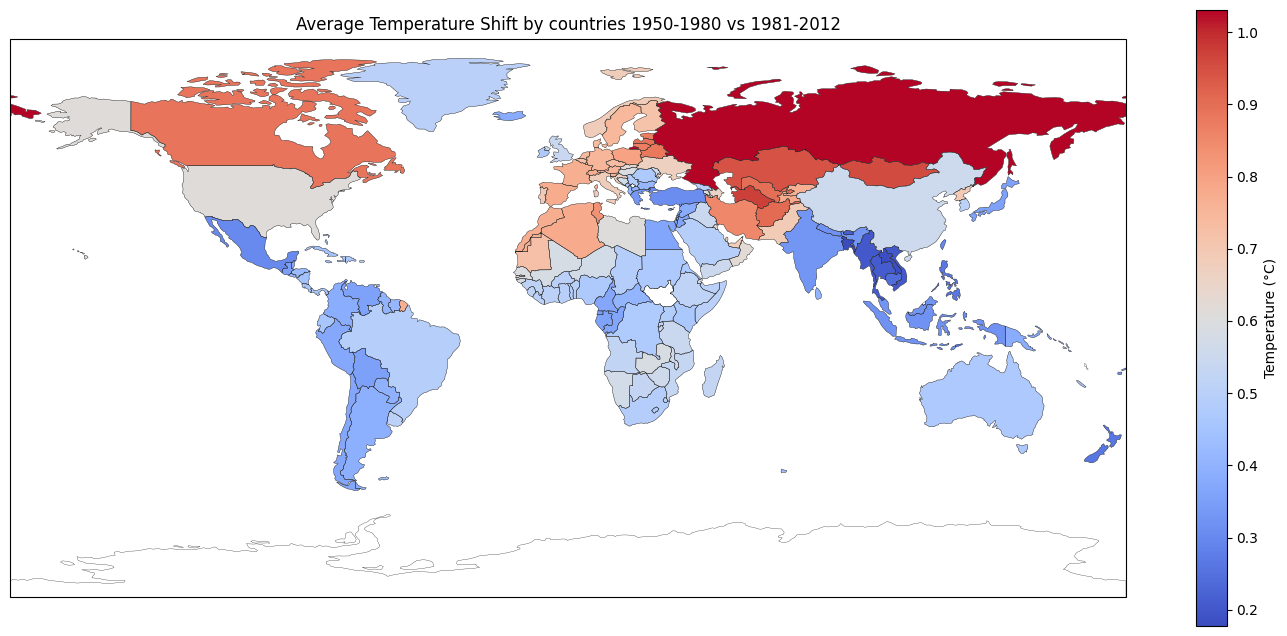

In [ ]:
# Відображення змін в абсолютному розмірі середньої температури за 30 років до попередніх 30 років

# Створення шкали кольорів
norm = mcolors.Normalize(vmin=world['ShiftAverageTemperature(1950-1980)vs(1981-2012)'].min(), vmax=world['ShiftAverageTemperature(1950-1980)vs(1981-2012)'].max())
cmap = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm')

# створеня мапи
fig = plt.figure(figsize=(18, 16))
ax = plt.axes(projection=ccrs.PlateCarree())

# Малювання країн з відповідними кольорами
world.boundary.plot(ax=ax, linewidth=0.2, edgecolor='black')
world.plot(column='ShiftAverageTemperature(1950-1980)vs(1981-2012)', cmap='coolwarm', linewidth=0.2, ax=ax, edgecolor='0.5')

# Додавання шкали кольорів
cbar = plt.colorbar(cmap, ax=ax, orientation='vertical', shrink=0.5, pad=0.05)
cbar.set_label('Temperature (°C)')

plt.title('Average Temperature Shift by countries 1950-1980 vs 1981-2012');

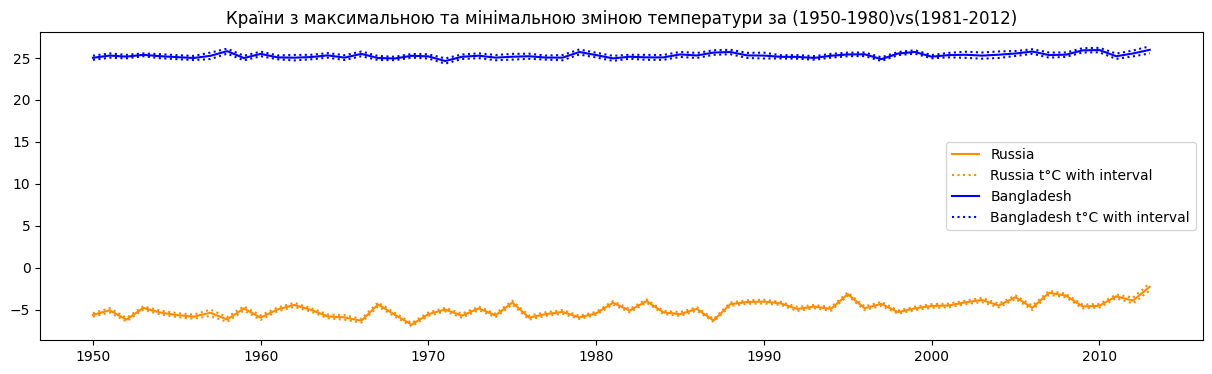

In [ ]:
# Країни з максимальною та мінімальною зміною температури за (1950-1980)vs(1981-2012)
max_shift2_country = world[world['ShiftAverageTemperature(1950-1980)vs(1981-2012)']==world['ShiftAverageTemperature(1950-1980)vs(1981-2012)'].max()]['Country'].values[0]
min_shift2_country = world[world['ShiftAverageTemperature(1950-1980)vs(1981-2012)']==world['ShiftAverageTemperature(1950-1980)vs(1981-2012)'].min()]['Country'].values[0]
fig, ax = plt.subplots(figsize=(15,4))
selection = temper_country_df[temper_country_df['Country'].isin([max_shift2_country, min_shift2_country])].groupby(['Country', 'year'])[['AverageTemperature', 'AverageTemperatureUncertainty']].mean().reset_index()
idx1 = selection[(selection['Country']==max_shift2_country) & (selection['year']>=1950)]
idx2 = selection[(selection['Country']==min_shift2_country) & (selection['year']>=1950)]
ax.plot(idx1.year, idx1.AverageTemperature, label=f'{max_shift2_country}', color='darkorange')
ax.plot(idx1.year, idx1.AverageTemperature+idx1.AverageTemperatureUncertainty, ls=":", color='darkorange')
ax.plot(idx1.year, idx1.AverageTemperature-idx1.AverageTemperatureUncertainty, label=f'{max_shift2_country} t°C with interval', ls=":", color='darkorange')
ax.plot(idx2.year, idx2.AverageTemperature, label=f'{min_shift2_country}', color='blue')
ax.plot(idx2.year, idx2.AverageTemperature+idx2.AverageTemperatureUncertainty, ls=":", color='blue')
ax.plot(idx2.year, idx2.AverageTemperature-idx2.AverageTemperatureUncertainty, label=f'{min_shift2_country} t°C with interval', ls=":", color='blue')
ax.legend()
ax.set_title("Країни з максимальною та мінімальною зміною температури за (1950-1980)vs(1981-2012)");

По країнам з максимальною та мінімальною різницею в температурах за розглянутий період дані мають неширокий довірчий інтервал, їх можна вважати надійними.

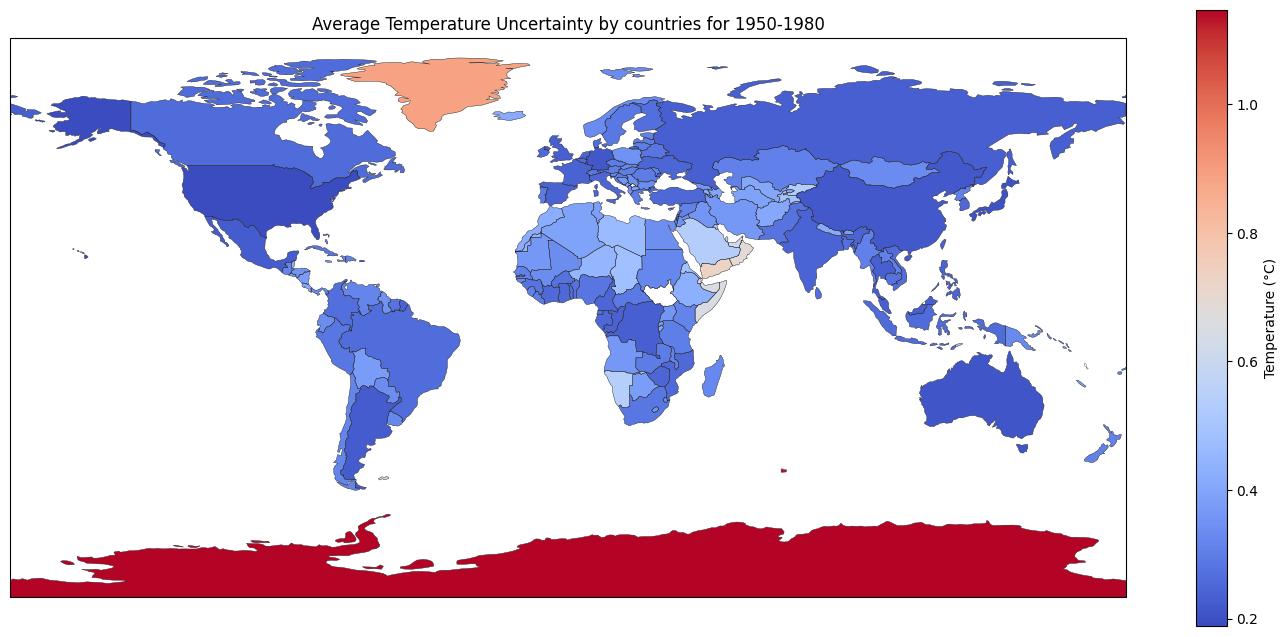

In [ ]:
# Відображення середнього довірчого інтервалу за період з 1950 по 1980рр. для середньої температури по країнах

# Створення шкали кольорів
norm = mcolors.Normalize(vmin=world[world['Country']!='Antarctica']['AverageTemperatureUncertainty'].min(),
                         vmax=world[world['Country']!='Antarctica']['AverageTemperatureUncertainty'].max())
cmap = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm')

# створеня мапи
fig = plt.figure(figsize=(18, 16))
ax = plt.axes(projection=ccrs.PlateCarree())

# Малювання країн з відповідними кольорами
world.boundary.plot(ax=ax, linewidth=0.2, edgecolor='black')
world.plot(column='AverageTemperatureUncertainty', cmap='coolwarm', linewidth=0.2, ax=ax, edgecolor='0.5')

# Додавання шкали кольорів
cbar = plt.colorbar(cmap, ax=ax, orientation='vertical', shrink=0.5, pad=0.05)
cbar.set_label('Temperature (°C)')

plt.title('Average Temperature Uncertainty by countries for 1950-1980');

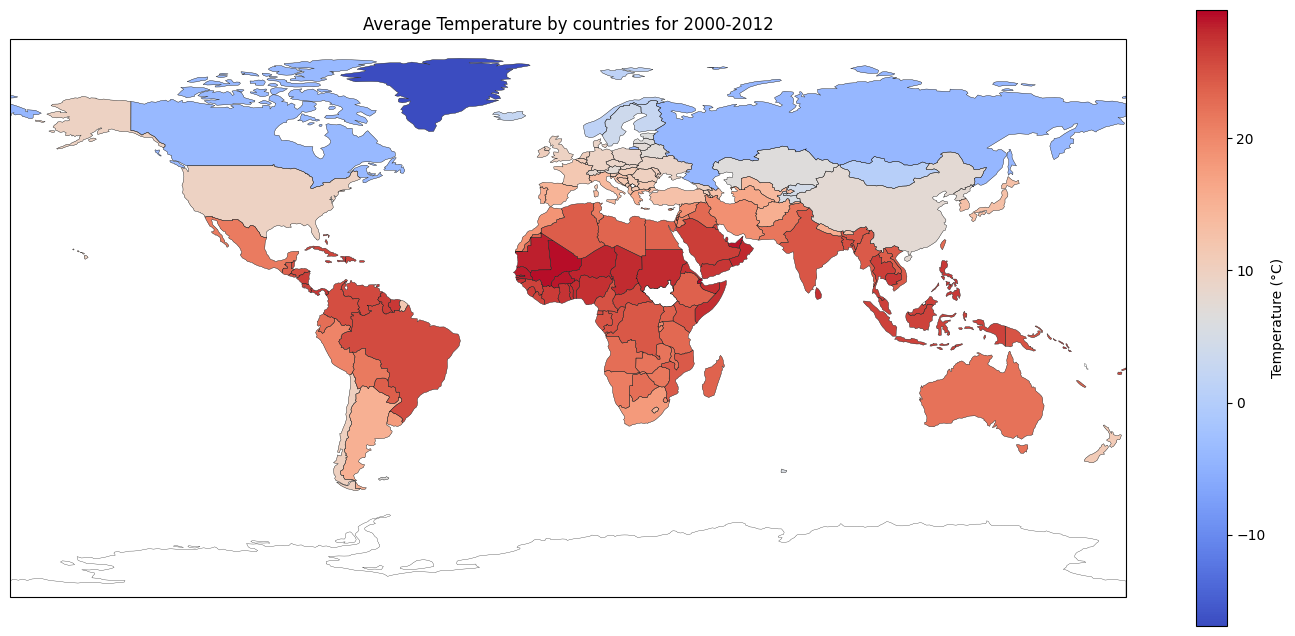

In [ ]:
# Відображення середньої температури по країнах за 2000-2012рр.

# Створення шкали кольорів
norm = mcolors.Normalize(vmin=world['AverageTemperature(2000-2012)'].min(),
                         vmax=world['AverageTemperature(2000-2012)'].max())
cmap = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm')

# створеня мапи
fig = plt.figure(figsize=(18, 16))
ax = plt.axes(projection=ccrs.PlateCarree())

# Малювання країн з відповідними кольорами
world.boundary.plot(ax=ax, linewidth=0.2, edgecolor='black')
world.plot(column='AverageTemperature(2000-2012)', cmap='coolwarm', linewidth=0.2, ax=ax, edgecolor='0.5')

# Додавання шкали кольорів
cbar = plt.colorbar(cmap, ax=ax, orientation='vertical', shrink=0.5, pad=0.05)
cbar.set_label('Temperature (°C)')

plt.title('Average Temperature by countries for 2000-2012');

### Огляд клімату в Україні

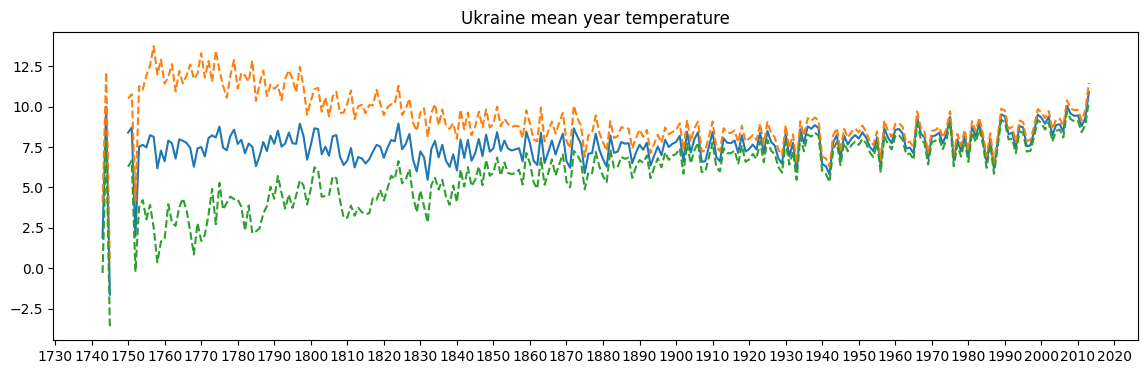

In [ ]:
ukr_temp = temper_country_df[temper_country_df['Country']=='Ukraine'].groupby('year')['AverageTemperature'].mean()
locator = ticker.MultipleLocator(10)
fig, ax = plt.subplots(figsize = (14,4))
ukr_temp_unc = temper_country_df.groupby('year')['AverageTemperatureUncertainty'].mean()
ax.plot(ukr_temp.index, ukr_temp.values)
ax.plot(ukr_temp.index, ukr_temp.values+ukr_temp_unc.values, ls="--")
ax.plot(ukr_temp.index, ukr_temp.values-ukr_temp_unc.values, ls="--")
ax.xaxis.set_major_locator(locator)
ax.set_title('Ukraine mean year temperature');

In [ ]:
temper_city_df[temper_city_df['Country']=='Ukraine']['City'].unique()

array(['Bila Tserkva', 'Cherkasy', 'Chernihiv', 'Chernivtsi', 'Horlivka',
       'Kerch', 'Kherson', 'Kiev', 'Kirovohrad', 'Kremenchuk',
       'Kryvyy Rih', 'Lvov', 'Makiyivka', 'Odesa', 'Pavlohrad', 'Poltava',
       'Rivne', 'Sumy', 'Uzhhorod', 'Vinnitsa', 'Vinnytsya',
       'Yevpatoriya', 'Zaporizhzhya', 'Zhytomyr'], dtype=object)

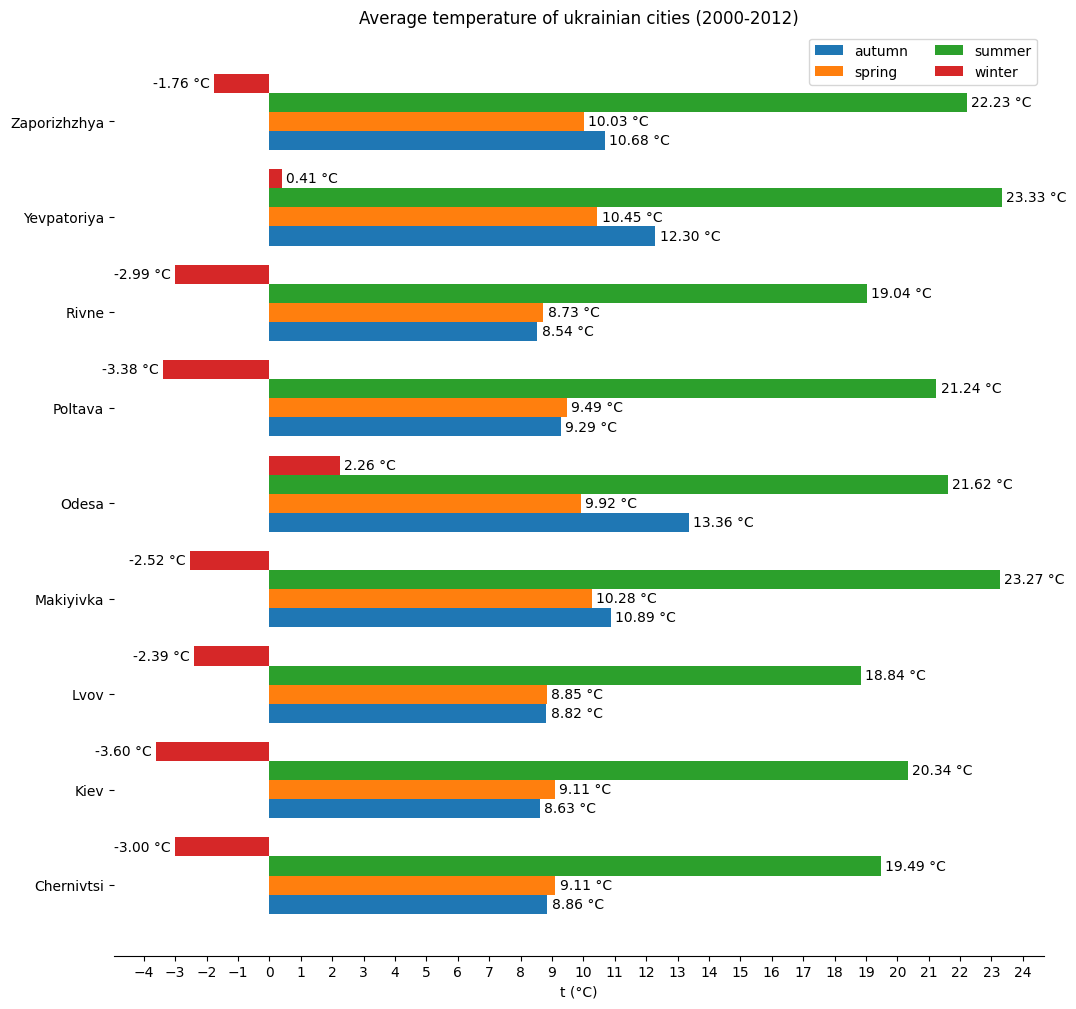

In [ ]:
cities = ['Chernivtsi', 'Makiyivka', 'Kiev', 'Odesa', 'Rivne', 'Lvov', 'Yevpatoriya', 'Zaporizhzhya', 'Poltava']
avg_temp_cities = temper_city_df[temper_city_df['City'].isin(cities) & (temper_city_df['year'].isin(range(2000,2013)))].reset_index()
pivtab=avg_temp_cities.pivot_table('AverageTemperature', index='season', columns='City', aggfunc='mean')
fig, ax = plt.subplots(figsize=(12, 12))
y = np.arange(len(pivtab.columns))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0
for season, temp in zip(pivtab.index, pivtab.values):
    offset = width * multiplier
    rects = ax.barh(y + offset, temp, width, label=season)
    ax.bar_label(rects, fmt = '%.2f °C', padding=3)
    multiplier += 1
ax.set_xlabel('t (°C)')
locator = ticker.MultipleLocator(1)
ax.xaxis.set_major_locator(locator)
ax.set_title('Average temperature of ukrainian cities (2000-2012)')
ax.set_yticks(y + width, pivtab.columns)
# ax.tick_params(axis="y", rotation=90)
ax.legend(loc='upper right', ncols=2)
for side in ['top', 'right', 'left']:
  ax.spines[side].set_visible(False)

### Зв'язок змін температури в містах світу в залежності від їх широти та довготи

In [20]:
# Зміна температури по містах за період (1950-1980) vs (1981-2012)
old_city_group = temper_city_df[temper_city_df['year'].isin(range(1950,1981))].groupby(['City'])['AverageTemperature'].mean()
new_city_group = temper_city_df[temper_city_df['year'].isin(range(1981,2013))].groupby(['City'])['AverageTemperature'].mean()
diff_city = new_city_group-old_city_group
diff_city = pd.DataFrame(diff_city).reset_index()
diff_city['AverageTemperatureShift(1950-1980;1950-1980)'] = diff_city['AverageTemperature']
diff_city.drop(['AverageTemperature'], inplace=True, axis=1)
diff_city = diff_city.merge(temper_city_df[['City', 'Latitude', 'Longitude']], on='City', how='left')
diff_city['Latitude'] = diff_city['Latitude'].str[:-1].astype('float')
diff_city['Longitude'] = diff_city['Longitude'].str[:-1].astype('float')
diff_city = diff_city.groupby('City').mean()
diff_city.head()


,AverageTemperatureShift(1950-1980;1950-1980),Latitude,Longitude
City,,,
A Coruña,0.755062,42.59,8.73
Aachen,0.726551,50.63,6.34
Aalborg,0.733849,57.05,10.33
Aba,0.373336,5.63,8.07
Abadan,0.665676,29.74,48.00


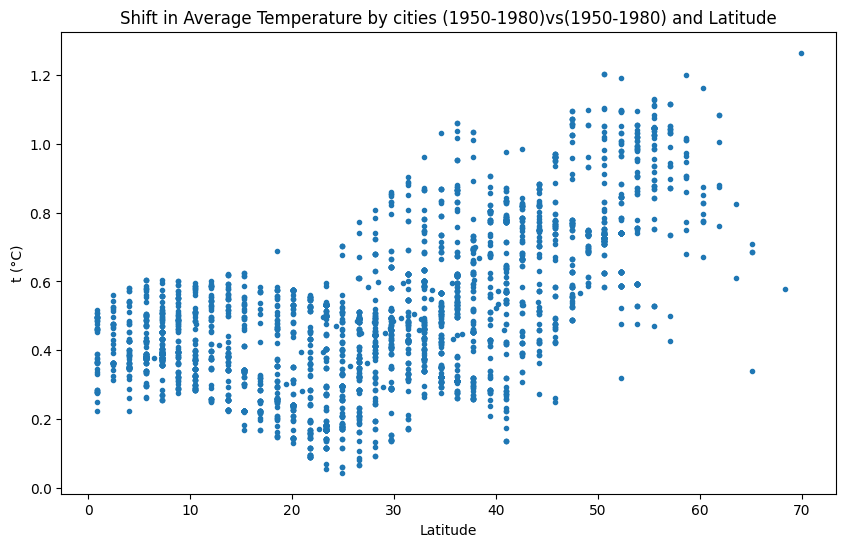

In [21]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(diff_city.Latitude, diff_city['AverageTemperatureShift(1950-1980;1950-1980)'], marker='.')
ax.set_xlabel('Latitude')
ax.set_ylabel('t (°C)')
ax.set_title('Shift in Average Temperature by cities (1950-1980)vs(1950-1980) and Latitude');

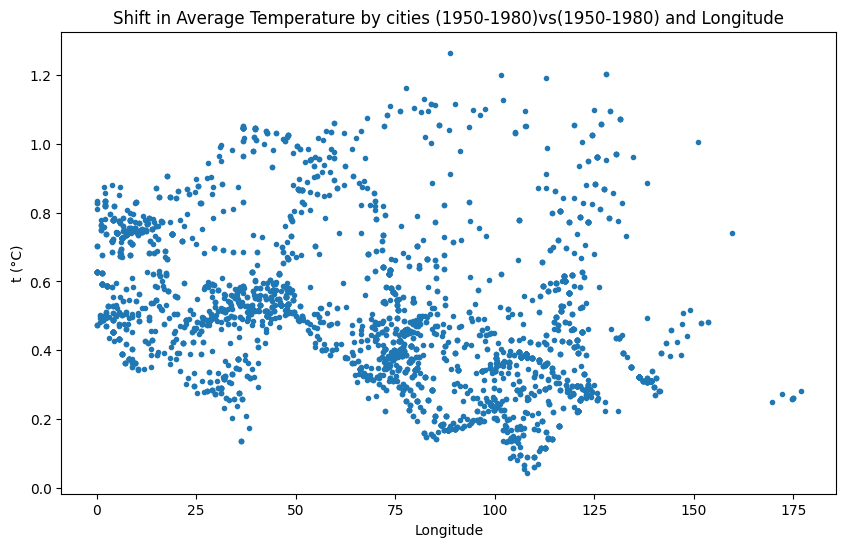

In [22]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(diff_city.Longitude, diff_city['AverageTemperatureShift(1950-1980;1950-1980)'], marker='.')
ax.set_xlabel('Longitude')
ax.set_ylabel('t (°C)')
ax.set_title('Shift in Average Temperature by cities (1950-1980)vs(1950-1980) and Longitude');

In [23]:
diff_city[['AverageTemperatureShift(1950-1980;1950-1980)','Latitude', 'Longitude']].corr().round(2)

,AverageTemperatureShift(1950-1980;1950-1980),Latitude,Longitude
AverageTemperatureShift(1950-1980;1950-1980),1.00,0.59,-0.39
Latitude,0.59,1.00,-0.17
Longitude,-0.39,-0.17,1.00


Є помірна кореляція між широтою та величиною зміни температури протягом 30 років відносно до попередніх тридцяти років, невеликий зворотній взаємозв'язок змін температури з довготою.